# Attempt to adjust sampling of classes we are interested in

In [1]:
import pandas as pd
import json
import os
import numpy as np
from pprint import pprint as pp
from matplotlib import pyplot as plt

In [11]:
with open("/Users/abpwrs/NLP-DL/config.json", "rb") as f:
    config = json.load(f) # load config
data_dir = config["data_dir"]
model_dir = config["model_dir"]
with open(os.path.join(data_dir,"stopwords.txt"), "r") as f:
    stopwords = f.readlines() # load stopwords                              
stopwords = set([i.split()[0] for i in stopwords]) # remove new line characters (\n) from strings
df = pd.read_csv(os.path.join(data_dir, "train.csv"))

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']


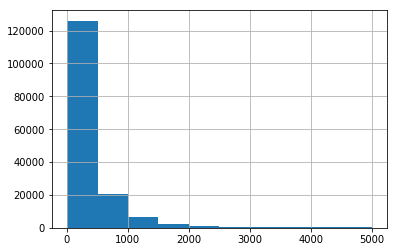

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000


In [12]:
pp(list(df.columns))
df['comment_length'] = df.comment_text.str.len()
df['comment_length'].hist()
plt.show()
df.describe()

In [13]:
bad_df = df.loc[(df['toxic'] == 1) | (df['severe_toxic'] == 1) | (df['obscene'] == 1) | (df['threat'] == 1) | (df['insult'] == 1) | (df['identity_hate'] == 1)]
clean_df = df.loc[(df['toxic'] != 1) & (df['severe_toxic'] != 1) & (df['obscene'] != 1) & (df['threat'] != 1) & (df['insult'] != 1) & (df['identity_hate'] != 1)]

pp(len(bad_df)/len(df))
pp(len(clean_df)/len(df))

0.10167887648758234
0.8983211235124177


In [17]:
df = df.append(bad_df).append(bad_df)
bad_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
count,48675.000000,48675.000000,48675.000000,48675.000000,48675.000000,48675.000000,48675.000000
mean,0.942619,0.098305,0.520740,0.029461,0.485485,0.086595,303.304037
std,0.232571,0.297730,0.499575,0.169096,0.499794,0.281243,619.390170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,128.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,283.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000


In [15]:
bad_df = df.loc[(df['toxic'] == 1) | (df['severe_toxic'] == 1) | (df['obscene'] == 1) | (df['threat'] == 1) | (df['insult'] == 1) | (df['identity_hate'] == 1)]
clean_df = df.loc[(df['toxic'] != 1) & (df['severe_toxic'] != 1) & (df['obscene'] != 1) & (df['threat'] != 1) & (df['insult'] != 1) & (df['identity_hate'] != 1)]

pp(len(bad_df)/len(df))
pp(len(clean_df)/len(df))

0.25348789976096364
0.7465121002390364


In [7]:
bad_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,319
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,57
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0,319
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,124
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,89
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0,68
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0,1798
